In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## Importando base de dados

In [37]:
fashion_mnist = keras.datasets.fashion_mnist


In [38]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [40]:
# Transformar a escala para que os valores fiquem entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [41]:
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta", 
               "sandalia", "camiseta", "tenis", "bolsa", "bota"]

In [8]:
# nomes_classes[y_train[0]]

In [9]:
# X_train[0]

bota


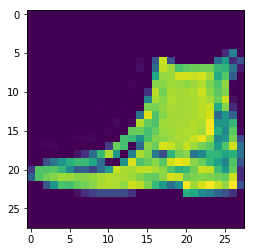

In [44]:
exemplo_n = 5
print(nomes_classes[y_train[exemplo_n]])
plt.imshow(X_train[exemplo_n], interpolation='nearest')
plt.show()

#  Rede Neural com Keras

In [32]:
nn = keras.models.Sequential()
nn.add(keras.layers.Flatten(input_shape=[28, 28]))
nn.add(keras.layers.Dense(300, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))
nn.add(keras.layers.Dense(10, activation="softmax"))
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

### Compilando e treinando o modelo

In [34]:
%time 
nn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history_nn = nn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 8.11 µs
Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 7s 131us/sample - loss: 0.7933 - accuracy: 0.7344 - val_loss: 0.5139 - val_accuracy: 0.8250
Epoch 2/20
55000/55000 [==============================] - 8s 141us/sample - loss: 0.5300 - accuracy: 0.8147 - val_loss: 0.4430 - val_accuracy: 0.8526
Epoch 3/20
55000/55000 [==============================] - 8s 140us/sample - loss: 0.4721 - accuracy: 0.8350 - val_loss: 0.4219 - val_accuracy: 0.8520
Epoch 4/20
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4399 - accuracy: 0.8452 - val_loss: 0.3915 - val_accuracy: 0.8652
Epoch 5/20
55000/55000 [==============================] - 8s 144us/sample - loss: 0.4174 - accuracy: 0.8528 - val_loss: 0.3832 - val_accuracy: 0.8626
Epoch 6/20
55000/55000 [==============================] - 7s 131us/sample - loss: 0.3985 - accuracy: 0.8584 - val_loss: 0.3748 - val_accu

### Avaliar o modelo

In [45]:
# prints the loss and the accuracy
nn.evaluate(X_test, y_test,verbose=1)

10000/10000 [==============================] - 3s 262us/sample - loss: 60.9244 - accuracy: 0.8296s 


[60.92439128608704, 0.8296]

# Treinando CNN com Keras

In [14]:
cnn = keras.models.Sequential([
keras.layers.InputLayer(input_shape = (28,28,1)),
keras.layers.Conv2D(64,5, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
keras.layers.MaxPool2D(2),
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
keras.layers.MaxPool2D(2),
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
keras.layers.MaxPool2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(rate=0.5),
keras.layers.Dense(64, activation="relu"),        
keras.layers.Dropout(rate=0.5),
keras.layers.Dense(10, activation="softmax")])        


In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 258)         297474    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 258)        

In [46]:
print(X_train.shape)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_valid_new = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2],1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train_new.shape)

(55000, 28, 28)
(55000, 28, 28, 1)


In [18]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history_cnn = cnn.fit(X_train_new, y_train, epochs=20, validation_data=(X_valid_new, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 475s 9ms/sample - loss: 1.3218 - accuracy: 0.5146 - val_loss: 0.6584 - val_accuracy: 0.7396
Epoch 2/20
55000/55000 [==============================] - 504s 9ms/sample - loss: 0.7864 - accuracy: 0.7110 - val_loss: 0.5440 - val_accuracy: 0.7978
Epoch 3/20
55000/55000 [==============================] - 540s 10ms/sample - loss: 0.6542 - accuracy: 0.7590 - val_loss: 0.4776 - val_accuracy: 0.8154
Epoch 4/20
55000/55000 [==============================] - 473s 9ms/sample - loss: 0.5909 - accuracy: 0.7836 - val_loss: 0.4297 - val_accuracy: 0.8332
Epoch 5/20
55000/55000 [==============================] - 473s 9ms/sample - loss: 0.5420 - accuracy: 0.8060 - val_loss: 0.4060 - val_accuracy: 0.8568
Epoch 6/20
55000/55000 [==============================] - 457s 8ms/sample - loss: 0.5074 - accuracy: 0.8233 - val_loss: 0.3864 - val_accuracy: 0.8564
Epoch 7/20
55000/55000 [==========================

### Avaliar o modelo

In [22]:
cnn.evaluate(X_test_new, y_test,verbose=1)

10000/10000 [==============================] - 23s 2ms/sample - loss: 22.5007 - accuracy: 0.8719


[22.50065226088291, 0.8719]

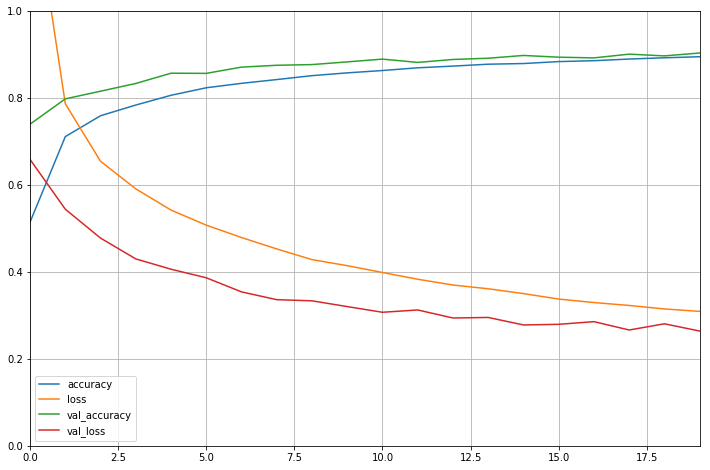

In [47]:
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()